# Statistical Learning Project

We need to categorize the problem. With the data we have, in this particular context, we want to classify if a book is rather a fiction or not.

Here we have the analysing task we few to pre-process (note that much I mean)

Later, it will be interesting to transform the raw data with futher features (or transformation on the variables).

We also need to adress all if this points:

- The accuracy of the model. (we need to be careful with this)
- The interpretability of the model.
- The complexity of the model.
- The scalability of the model.
- How long does it take to build, train, and test the model?
- How long does it take to make predictions using the model?
- Does the model meet the business goal ?

And also: Optimize hyperparameters with grid search

In [349]:
"""
# Plan

1. INTRODUCTION

2. Librairies and data import 

3. Data Wrangling
3.1 Missing Values
3.2 Duplicates
3.3 Distributions

4. Data Analysis
4.1 Which Authors Write the Most Bestsellers?
4.2 Which Genre Dominates which Year?
4.3 How does the Mean Price Change over the Years?
4.4 What's the Mean Price in each Genre?
4.5 Which Books have the Most Reviews?
4.6 Do Genres Differ in the Number of Reviews?
4.7 Which Books have the Highest User Rating?
4.8 How does the User Rating Change over the Years?

5. Features engeenering
5.1. Features selection 
5.2. Features creation

6. First modelisation evaluation with 10-CV: What's the Genre of a Book ? 
6.1 Parametric methods : 60% train - 40% test
6.2 Non parametric methods: 80% train - 20% test

7. Adjusting and choice of Hyperparmeter: Final Fitting on full X_train
7.1 Parametric
7.1.1 Logisitc regression
7.1.2 Naive Bayes

7.2 NON parametric
7.2.1 Decision Trees
7.2.2 Support Vector Machine
7.2.3 k-Nearest Neighbors

8. Observations
"""

"\n# Plan\n\n1. INTRODUCTION\n\n2. Librairies and data import \n\n3. Data Wrangling\n3.1 Missing Values\n3.2 Duplicates\n3.3 Distributions\n3.4 Preprocessing\n\n4. Data Analysis\n4.1 Which Authors Write the Most Bestsellers?\n4.2 Which Genre Dominates which Year?\n4.3 How does the Mean Price Change over the Years?\n4.4 What's the Mean Price in each Genre?\n4.5 Which Books have the Most Reviews?\n4.6 Do Genres Differ in the Number of Reviews?\n4.7 Which Books have the Highest User Rating?\n4.8 How does the User Rating Change over the Years?\n\n5. Features engeenering\n5.1. Features selection \n5.2. Features creation\n\n6. First modelisation evaluation with 10-CV: What's the Genre of a Book ? \n6.1 Parametric methods : 60% train - 40% test\n6.2 Non parametric methods: 80% train - 20% test\n\n7/ Adjusting and choice of Hyperparmeter: Final Fitting on full X_train\n7.1 Parametric\n7.1.1 Logisitc regression\n7.1.2 Naive Bayes\n\n7.2 NON parametric\n7.2.1 Decision Trees\n7.2.2 Support Vector

# 1. INTRODUCTION

# 2. Librairies and data import 

### -- Libraries

In [1]:
"""IMPORT OF PCK"""

import os
import glob
import tqdm
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


import pandas as pd
import numpy as np
from scipy import stats
import math
import scipy.signal as signal
import random

from pathlib import Path
from IPython.core.display import display, HTML #display(HTML(data.to_html())) to show all variables
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
"""DIRECTORY defintion"""
os.getcwd()

'C:\\Users\\ville\\PycharmProjects\\stat_projetcs\\git_project_stat\\Stats_projetcs'

### -- data import 

In [3]:
data_folder = Path(r"C:\Users\ville\PycharmProjects\stat_projetcs\git_project_stat\Stats_projetcs\Appr_Stat\data\Books_Dataset_20210108\archive")
bestsellers = data_folder / "bestsellers_with_categories.csv"
dta = pd.read_csv(bestsellers)
dta = dta.rename(columns={"User Rating": "Rating"})


# 3. Data Wrangling

In [4]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     550 non-null    object 
 1   Author   550 non-null    object 
 2   Rating   550 non-null    float64
 3   Reviews  550 non-null    int64  
 4   Price    550 non-null    int64  
 5   Year     550 non-null    int64  
 6   Genre    550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
dta.head()

,Name,Author,Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
dta.tail()

,Name,Author,Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


With the info method we can see that we have, for each column of the dataframe, 550 non null values. Each one of them is numerical except for "Name" and "Author" columns.

In the next step we make sure that there are not nan value in the dataframe. 

## 3.1 Missing values

In [7]:
# We look for missing values:
def num_missing(x):
    return sum(x.isnull())
# Application on the dataframe:
print("Missing values by columns:")
print(dta.apply(num_missing, axis=0))

Missing values by columns:
Name       0
Author     0
Rating     0
Reviews    0
Price      0
Year       0
Genre      0
dtype: int64


From this step we conclude that thare are not nan values in the dataframe.

Same verification but with values = 0.

In [8]:
dta.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,550.0,4.618364,0.226980,3.3,4.5,4.7,4.80,4.9
Reviews,550.0,11953.281818,11731.132017,37.0,4058.0,8580.0,17253.25,87841.0
Price,550.0,13.100000,10.842262,0.0,7.0,11.0,16.00,105.0
Year,550.0,2014.000000,3.165156,2009.0,2011.0,2014.0,2017.00,2019.0


We see that there are some zero values in the price columns, let's investigate this  

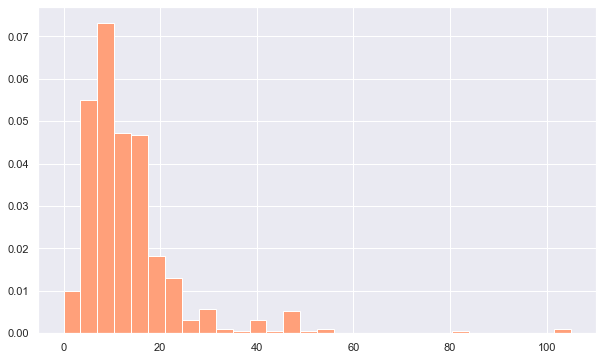

In [9]:
plt.figure(figsize =(10,6))
plt.hist(dta["Price"], bins=30, density=True, color='lightsalmon')
plt.show()

After a quick look on Amazon, we constat that the price = 0 only for audio book (with Audible). 
This price is not representative of the price of the others books. 

In [10]:
nul_price = dta.loc[dta["Price"] == 0]
type(nul_price)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Genre', ylabel='count'>

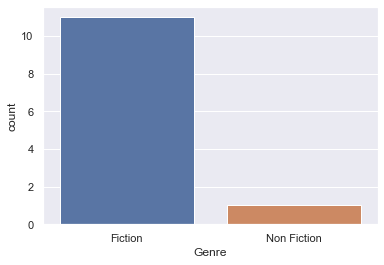

In [11]:
sns.countplot(x= nul_price['Genre'])

As we see previously, the book of price = 0 corresponds to "Audible books". Only 1/12 is a non fiction when the price = 0.

This generalisation is not true for a price > 0, let's see the price of this books with the same author.

In [12]:
dta[dta['Author'].isin(['Alice Schertle', 
                                    'Harper Lee', 
                                    'Jeff Kinney', 
                                    'RH Disney', 
                                    'Stephenie Meyer'])].sort_values('Author')

,Name,Author,Rating,Reviews,Price,Year,Genre
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
509,To Kill a Mockingbird,Harper Lee,4.8,26234,7,2019,Fiction
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction


In [ ]:
################################# ADD SOMETHING FOR PRICE INDENTATION ######################

<b>
<b>
<b>
<b>
<b>
<b>

## 3.2 Duplicate 


We can see from the tail of our dataset that there are the same book, a multiple time.

The only difference is the year, in term of features. We can imagine that it represent the year when the book pop_up or the year when it becomes a bestsellers.
After a quick verification on internet, we can see that it represents: The year when the book was past of bestsellings.
Lets create a feature representing the time the book had been a bestsellings.

In the next steps, we will treat this problematic.

### -- Cleaning of "Name" column: case sentivity
Due to case sensitivity, the same book, with a different writing, can be misinterpreted to a different one.
We can correct this errors of case sensitivity by putting all the name in upper case.

In [13]:
dta["Name"] = dta["Name"].str.upper()

## -- Cleaning of "Author" column

We identified some difference for the reference of some authors, such as J.K Rowling. To fix this error, we smooth out the author name to J.K Rowling (without space between ".")

In [14]:
#To correct the space problem for few authors
for index, value in dta["Author"].items():
    if value.startswith("J."):
        change = value.replace(" ","")
        dta.loc[index, "Author"] = change
    else:
        pass

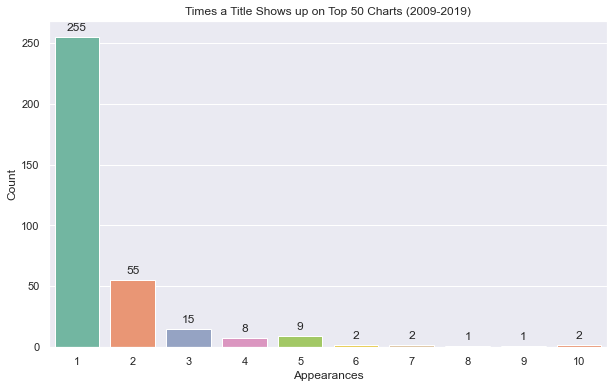

In [15]:
plt.figure(figsize=(10,6))

ax = sns.countplot(data=dta, x=dta.Name.value_counts(), palette="Set2");

for p in ax.patches:
    ax.annotate(format(p.get_height(), 'd'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

ax.set(xlabel="Appearances", ylabel="Count");
ax.set_title("Times a Title Shows up on Top 50 Charts (2009-2019)");
plt.show();

In [16]:
dta_repeat = pd.DataFrame([x, y] for x, y in dta.Author.value_counts().iteritems() if (y > 1))
dta_repeat.columns = ['Author','Top 50 Appearances']
dta_repeat.columns

Index(['Author', 'Top 50 Appearances'], dtype='object')

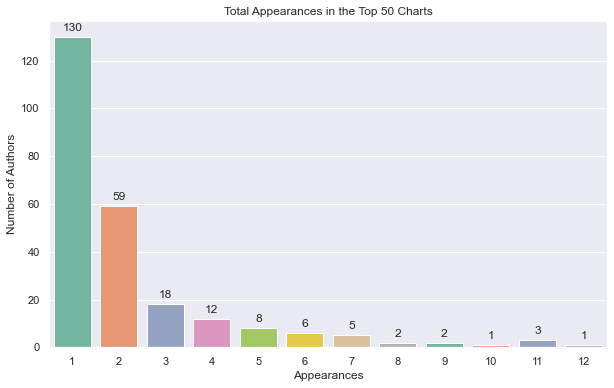

In [17]:
#Looking for redundancy in the authors

plt.figure(figsize=(10,6))

ax = sns.countplot(data=dta, x=dta.Author.value_counts(), palette="Set2")

for p in ax.patches:
    ax.annotate(format(p.get_height(), 'd'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

ax.set(xlabel="Appearances", ylabel="Number of Authors")
ax.set_title("Total Appearances in the Top 50 Charts")
plt.show()

In [18]:
dta[dta.duplicated(subset=['Name', 'Author'], keep=False)].sort_values('Name')

,Name,Author,Rating,Reviews,Price,Year,Genre
9,A MAN CALLED OVE: A NOVEL,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A MAN CALLED OVE: A NOVEL,Fredrik Backman,4.6,23848,8,2017,Fiction
20,ALL THE LIGHT WE CANNOT SEE,Anthony Doerr,4.6,36348,14,2014,Fiction
21,ALL THE LIGHT WE CANNOT SEE,Anthony Doerr,4.6,36348,14,2015,Fiction
32,BECOMING,Michelle Obama,4.8,61133,11,2018,Non Fiction
...,...,...,...,...,...,...,...
541,WONDER,R. J. Palacio,4.8,21625,9,2014,Fiction
547,YOU ARE A BADASS: HOW TO STOP DOUBTING YOUR GR...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,YOU ARE A BADASS: HOW TO STOP DOUBTING YOUR GR...,Jen Sincero,4.7,14331,8,2018,Non Fiction
546,YOU ARE A BADASS: HOW TO STOP DOUBTING YOUR GR...,Jen Sincero,4.7,14331,8,2016,Non Fiction


### --Creation of an unique_name dataframe, wich represent the dataset with only the firts occurence in bestsellings year 

In [19]:
dta_unique = dta.drop_duplicates(subset=['Name', 'Author'])

## 3.3 distributions 

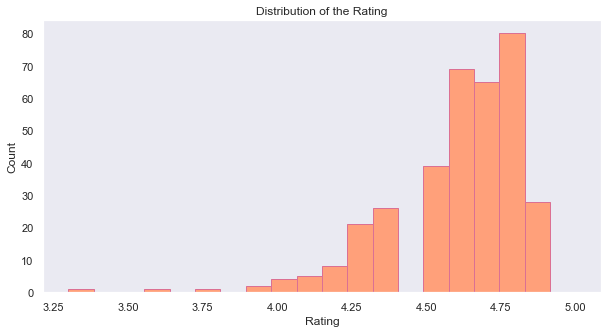

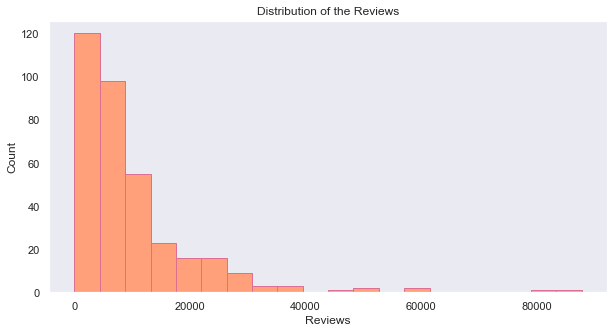

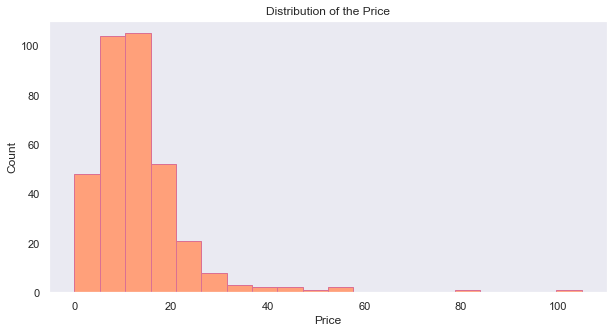

In [20]:
def distribution_plot(df, col, boundaries=(0, 100)):
        
    plt.figure(figsize=(10,5))
    df[col].hist(range=boundaries, bins=20, color='lightsalmon', edgecolor='palevioletred', 
                       linewidth=1)  
    plt.grid(False)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Distribution of the ' + col)
    plt.show()
    

distribution_plot(dta_unique,'Rating', boundaries=(3.3, 5))
distribution_plot(dta_unique, 'Reviews', boundaries=(37, 87841))
distribution_plot(dta_unique, 'Price', boundaries=(0, 105)) 


### -- Genre target variable 

In [21]:
dta["Genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [22]:
dta["Genre"].value_counts()

# 310 Non fiction
# 240 Fiction 

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

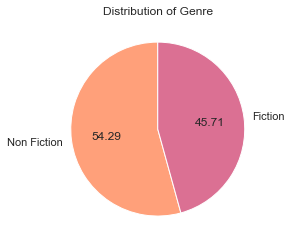

In [23]:
genre_distribution = dta_unique['Genre'].value_counts()
genre_distribution
plt.pie(genre_distribution, labels=['Non Fiction', 'Fiction'], autopct='%1.2f', startangle=90, 
           colors=['lightsalmon', 'palevioletred'])
_ = plt.title('Distribution of Genre')

# 4. Data Analysis

## -- Look for correlation

          Reviews     Price      Year    Rating
Reviews  1.000000 -0.109182  0.263560 -0.001729
Price   -0.109182  1.000000 -0.153979 -0.133086
Year     0.263560 -0.153979  1.000000  0.242383
Rating  -0.001729 -0.133086  0.242383  1.000000


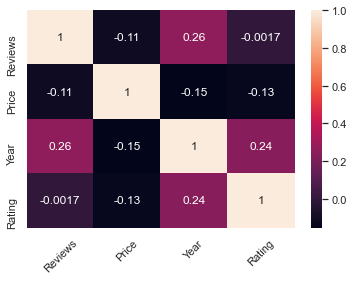

In [26]:
numerical = list(set(dta.columns) -
                 set(['Name','Author']))
corr_matrix = dta[numerical].corr()

sns.heatmap(corr_matrix, annot=True);
plt.xticks(rotation=45);

print(corr_matrix)

## -- Step Outlier detection

In [27]:
dta["Genre"] = dta.Genre.replace(to_replace=['Fiction', 'Non Fiction'], value=[0, 1])

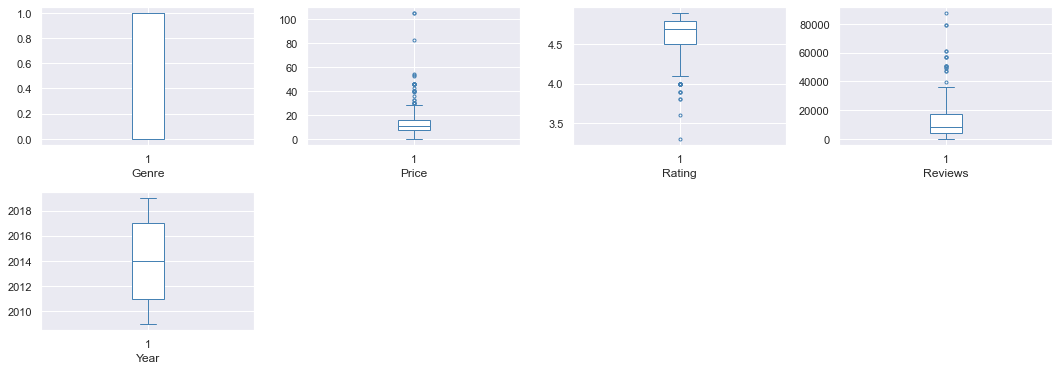

In [28]:
dta_quanti = dta[dta.columns.difference(["Name", "Author"])]
c = 'steelblue'
blue_dict =  {'patch_artist': True,
             'boxprops': dict(color=c, facecolor='w'),
             'capprops': dict(color=c),
             'flierprops': dict(color=c, markeredgecolor=c,marker="."),
             'medianprops': dict(color=c),
             'whiskerprops': dict(color=c)}

plt.close()
plt.figure(figsize=(15,10))
for i in np.arange(start=0,stop=dta_quanti.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.boxplot(dta_quanti.iloc[:,i],**blue_dict)
    plt.xlabel(dta_quanti.columns[i])
plt.tight_layout()
plt.show()

## -- Bivariate analysis

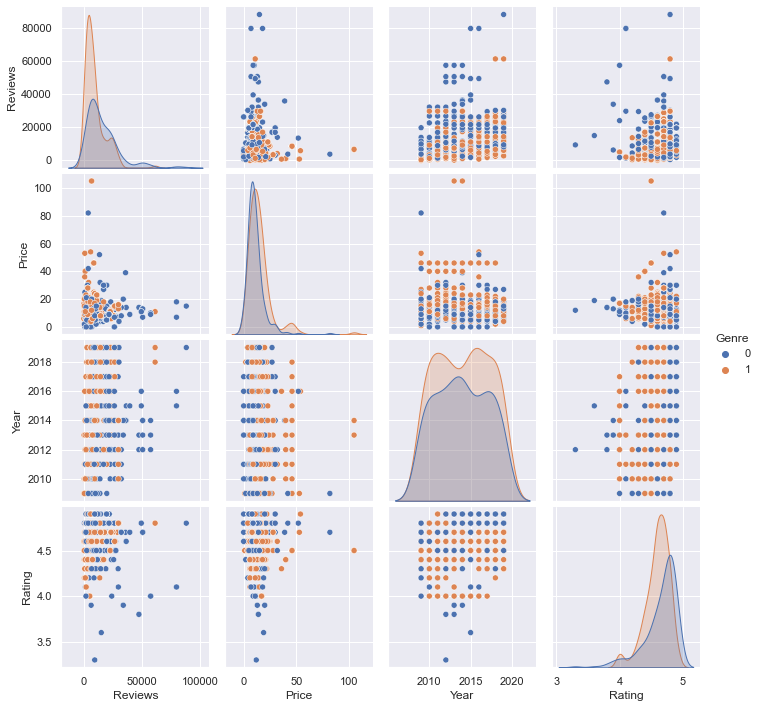

In [30]:
#With genre 0 = Fiction, genre 1 = Non fiction
sns.pairplot(dta_quanti, hue='Genre',vars=['Reviews', 'Price', 'Year', 'Rating'],markers='o')

# 5. Features engineering

## --Features creation 

###  -- Creation of "sum_best" column

From the previosu graph we decided to create a column: "sum_best". This column correspond to the number of year a book had been in the best bestsellings within the last 10 years. 

In [190]:
dta["sum_best"]=""
dta["sum_best"] = dta.groupby("Name").transform('count')
dta.tail()

,Name,Author,Rating,Reviews,Price,Year,Genre,sum_best
545,WRECKING BALL (DIARY OF A WIMPY KID BOOK 14),Jeff Kinney,4.9,9413,8,2019,0,1
546,YOU ARE A BADASS: HOW TO STOP DOUBTING YOUR GR...,Jen Sincero,4.7,14331,8,2016,1,4
547,YOU ARE A BADASS: HOW TO STOP DOUBTING YOUR GR...,Jen Sincero,4.7,14331,8,2017,1,4
548,YOU ARE A BADASS: HOW TO STOP DOUBTING YOUR GR...,Jen Sincero,4.7,14331,8,2018,1,4
549,YOU ARE A BADASS: HOW TO STOP DOUBTING YOUR GR...,Jen Sincero,4.7,14331,8,2019,1,4


### -- Add of a weighted review column

In [24]:
#Give an information on the dataset with the cosidered "best movies", with minimum 3000 review
data_order = dta.groupby(['Name', 'Author', 'Genre'], as_index=False)[['Rating', 'Reviews']].mean()
data_order = data_order[data_order['Reviews']>3000]
data_order = data_order.sort_values('Rating', ascending=False).head(20)
data_order

,Name,Author,Genre,Rating,Reviews
177,OBAMA: AN INTIMATE PORTRAIT,Pete Souza,1,4.9,3192.0
197,RUSH REVERE AND THE FIRST PATRIOTS: TIME-TRAVE...,Rush Limbaugh,0,4.9,3836.0
117,HARRY POTTER AND THE PRISONER OF AZKABAN: THE ...,J.K.Rowling,0,4.9,3146.0
118,HARRY POTTER AND THE SORCERER'S STONE: THE ILL...,J.K.Rowling,0,4.9,10052.0
112,HAMILTON: THE REVOLUTION,Lin-Manuel Miranda,1,4.9,5867.0
108,"GOODNIGHT, GOODNIGHT CONSTRUCTION SITE (HARDCO...",Sherri Duskey Rinker,0,4.9,7038.0
36,"BROWN BEAR, BROWN BEAR, WHAT DO YOU SEE?",Bill Martin Jr.,0,4.9,14344.0
311,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,0,4.9,8842.0
66,DOG MAN AND CAT KID: FROM THE CREATOR OF CAPTA...,Dav Pilkey,0,4.9,5062.0
208,STRANGE PLANET (STRANGE PLANET SERIES),Nathan W. Pyle,0,4.9,9382.0


Use of weighted mean to attribute a review/rating which corresponds more to the reality field

with W_mean = ( ( v / m+v) * R) (( m / m+v)*C)

m = number of rating

C = mean Review

v= number of review

R = average numb of rating


In [191]:
# Weighted rating
m = min(dta['Reviews'])
C = dta['Rating'].mean()
def weighted_rating(x, m=m, C=C):
    v = x['Reviews']
    R = x['Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [192]:
dta['Weighted Rating'] = dta.apply(weighted_rating, axis=1)

In [193]:
dta.groupby(['Name','Author','Genre'], as_index=False)[['Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(by='Weighted Rating', ascending=False).head(10)

,Name,Author,Genre,Rating,Reviews,Weighted Rating
178,"OH, THE PLACES YOU'LL GO!",Dr. Seuss,0,4.9,21834.0,4.899524
114,HARRY POTTER AND THE CHAMBER OF SECRETS: THE I...,J.K.Rowling,0,4.9,19622.0,4.899470
139,JESUS CALLING: ENJOYING PEACE IN HIS PRESENCE ...,Sarah Young,1,4.9,19576.0,4.899469
309,THE VERY HUNGRY CATERPILLAR,Eric Carle,0,4.9,19546.0,4.899468
36,"BROWN BEAR, BROWN BEAR, WHAT DO YOU SEE?",Bill Martin Jr.,0,4.9,14344.0,4.899275
69,DOG MAN: FETCH-22: FROM THE CREATOR OF CAPTAIN...,Dav Pilkey,0,4.9,12619.0,4.899177
151,LAST WEEK TONIGHT WITH JOHN OLIVER PRESENTS A ...,Jill Twiss,0,4.9,11881.0,4.899126
118,HARRY POTTER AND THE SORCERER'S STONE: THE ILL...,J.K.Rowling,0,4.9,10052.0,4.898967
348,WRECKING BALL (DIARY OF A WIMPY KID BOOK 14),Jeff Kinney,0,4.9,9413.0,4.898897
208,STRANGE PLANET (STRANGE PLANET SERIES),Nathan W. Pyle,0,4.9,9382.0,4.898894


In [194]:
dta = dta.drop("Rating", axis=1)
dta.head(5)

,Name,Author,Reviews,Price,Year,Genre,sum_best,Weighted Rating
0,10-DAY GREEN SMOOTHIE CLEANSE,JJ Smith,17350,8,2016,1,1,4.699826
1,11/22/63: A NOVEL,Stephen King,2052,22,2011,0,1,4.600325
2,12 RULES FOR LIFE: AN ANTIDOTE TO CHAOS,Jordan B. Peterson,18979,15,2018,1,1,4.699841
3,1984 (SIGNET CLASSICS),George Orwell,21424,6,2017,0,1,4.699859
4,"5,000 AWESOME FACTS (ABOUT EVERYTHING!) (NATIO...",National Geographic Kids,7665,12,2019,1,1,4.799127


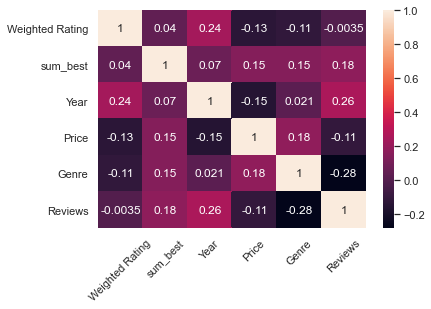

In [29]:
numerical = list(set(dta.columns) -
                 set(['Name','Author']))
corr_matrix = dta[numerical].corr()

sns.heatmap(corr_matrix, annot=True);
plt.xticks(rotation=45);

## --Vectorizer 

In [31]:
unique_bestsellers_preprocessed = pd.get_dummies(dta_unique.drop(['Name'], axis=1),drop_first=True)

In [32]:
# Process book titles with NLP methods for modeling
tfidf = TfidfVectorizer()
transformed_names = tfidf.fit_transform(dta_unique['Name'])
transformed_names_df = pd.DataFrame(transformed_names.toarray(), columns=tfidf.get_feature_names())
unique_bestsellers_preprocessed = pd.concat([unique_bestsellers_preprocessed.reset_index(drop=True),
                                             transformed_names_df.reset_index(drop=True)], axis=1)

In [40]:
unique_bestsellers_preprocessed

,Rating,Reviews,Price,Year,Author_Adam Gasiewski,Author_Adam Mansbach,Author_Adir Levy,Author_Admiral William H. McRaven,Author_Adult Coloring Book Designs,Author_Alan Moore,...,wright,wrinkle,writing,year,york,you,your,zelda,zone,zoo
0,4.7,17350,8,2016,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,4.6,2052,22,2011,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,4.7,18979,15,2018,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,4.7,21424,6,2017,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,4.8,7665,12,2019,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,4.5,10760,15,2012,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
346,4.2,1302,11,2010,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
347,4.8,21625,9,2013,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
348,4.9,9413,8,2019,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


We constat there are still smme books wich are count multiple time, after a closer look on data we see that their price is changing over time.


# 6. First modelisation evaluation with 10-CV: What's the Genre of a Book ? 


Context: Because it is pointless to predict the genre for books that you already know, the model is calculated on a data set that takes books that occur over a number of years only once into account. 

We use GridSearchCV to decide between:

Parametric models
- Logistic Regression.
- Naive Bayes.

Non parametric models 
- Decision Trees.
- Support Vector Machine.
- k-Nearest Neighbors.



In [41]:
dta_mod = unique_bestsellers_preprocessed.copy()

#col = ['Author', 'Year']

#dta_mod = dta[dta.columns.difference(col)]

#dta_mod = dta_mod.drop_duplicates(subset=["Name"])

#dta_mod = dta_mod[dta_mod.columns.difference(["Name"])]


In [42]:
#import of pck for modelisation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from warnings import simplefilter
from sklearn import model_selection
from sklearn.preprocessing import  StandardScaler
import os
import warnings
from sklearn.exceptions import DataConversionWarning

from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict, GridSearchCV


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error

## 6.1 Parametric methods : 60% train - 40% test

In [43]:
# We kept 40% of the dataset for testing 

seed = 7
test_size = 0.4
scoring="accuracy"

#shuffle of the data
dta_mod = dta_mod.sample(frac=1).reset_index(drop=True) 


X = unique_bestsellers_preprocessed.drop('Genre_Non Fiction', axis=1)
y = unique_bestsellers_preprocessed['Genre_Non Fiction']
#X = dta_mod.loc[:, dta_mod.columns != 'Genre'].to_numpy().astype("int8")
#y = dta_mod.loc[:,"Genre"].to_numpy().astype("int8")

ss = StandardScaler()
X_s = ss.fit_transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_s, y, test_size=test_size, random_state=seed)


In [44]:
parametric_models = []

parametric_models.append(('LR', LogisticRegression(random_state=None)))
parametric_models.append(('GauNB', GaussianNB()))

parametric_results=[]
parametric_names=[]

In [45]:
Lname=[parametric_models[0][0], parametric_models[1][0]]
Lmodel=[parametric_models[0][1], parametric_models[1][1]]

In [46]:
def prediction(N,M,results,names):
#for name,model in models:
    from warnings import simplefilter
    simplefilter(action='ignore', category=FutureWarning)

    cv_results=model_selection.cross_val_score(M,X_train,y_train,cv=10,scoring=scoring)
    results.append(cv_results)
    names.append(N)
    print("%s: We have a %0.5f mean accuracy and standard deviation of %0.5f with 10 fold-CV" % (N, cv_results.mean(), cv_results.std()))
    return

In [47]:
Lgt_accuracy = prediction(parametric_models[0][0], parametric_models[0][1], parametric_results,parametric_names)
GauNB_accuracy =  prediction(parametric_models[1][0], parametric_models[1][1], parametric_results,parametric_names)

LR: We have a 0.83810 mean accuracy and standard deviation of 0.09571 with 10 fold-CV
GauNB: We have a 0.81905 mean accuracy and standard deviation of 0.06667 with 10 fold-CV


## 6.2 NON Parametric methods : 80% train - 20% test

In [52]:
# definition of train: + train test slpit of data

seed = 7
test_size = 0.2
scoring="accuracy"


#shuffle of the data
dta_mod = dta_mod.sample(frac=1).reset_index(drop=True)

X2 = unique_bestsellers_preprocessed.drop('Genre_Non Fiction', axis=1)
y2 = unique_bestsellers_preprocessed['Genre_Non Fiction']
#X2 = dta_mod.loc[:, dta_mod.columns != 'Genre'].to_numpy().astype("int8")
#y2 = dta_mod.loc[:,"Genre"].to_numpy().astype("int8")

ss2 = StandardScaler()
X_s2 = ss.fit_transform(X)

X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X_s2, y2, test_size=test_size, random_state=seed)


In [53]:
NONparametric_models = []

NONparametric_models.append(('RDF', RandomForestClassifier(n_estimators=100)))
NONparametric_models.append(('KNN', KNeighborsClassifier()))
NONparametric_models.append(('SVC', SVC(gamma='auto')))

NONparametric_results=[]
NONparametric_names=[]

In [54]:
Lname2=[NONparametric_models[0][0], NONparametric_models[1][0], NONparametric_models[2][0]]
Lmodel2=[NONparametric_models[0][1], NONparametric_models[1][1], NONparametric_models[2][1]]

In [55]:
RDF_accuracy = prediction(NONparametric_models[0][0], NONparametric_models[0][1], NONparametric_results, NONparametric_names)
KNN_accuracy =  prediction(NONparametric_models[1][0], NONparametric_models[1][1], NONparametric_results, NONparametric_names)
SVC_accuracy =  prediction(NONparametric_models[2][0], NONparametric_models[2][1], NONparametric_results, NONparametric_names)

RDF: We have a 0.84762 mean accuracy and standard deviation of 0.05553 with 10 fold-CV
KNN: We have a 0.42857 mean accuracy and standard deviation of 0.00000 with 10 fold-CV
SVC: We have a 0.79524 mean accuracy and standard deviation of 0.09295 with 10 fold-CV


# 7. Adjusting and choice of Hyperparmeter: Final Fitting on full X_train


## 7.1 Parametric
## 7.1.1 Logisitc regression

In [56]:
my_scaler=StandardScaler()
#X_train wich had already benn normalised
X_test_norm = my_scaler.fit_transform(X_test)
X_test2_norm = my_scaler.fit_transform(X_test2)

In [57]:
# Modification of C : inverse de la force de la contrainte; si C est faible, alors la contrainte l'est également

reg_log=linear_model.LogisticRegression(C=99000, solver='lbfgs',random_state=None)
lr_results = model_selection.cross_val_score(reg_log, X_train, y_train, cv=10)

print("%0.5f mean accuracy and standard deviation of %0.5f with 10 fold-CV" % (lr_results.mean(), lr_results.std()))

0.75714 mean accuracy and standard deviation of 0.07206 with 10 fold-CV


In [58]:
# on essaie en ajoutant un classweight 'balanced' afin d'équilibrer la différence de pondération entre les classes fiction
# et non-fiction

reg_log_balanced=linear_model.LogisticRegression(C=1e8, class_weight='balanced', solver='lbfgs', random_state=None)
lr_results = model_selection.cross_val_score(reg_log_balanced, X_train, y_train, cv=10)
print("%0.5f mean accuracy and standard deviation of %0.5f with 10 fold-CV" % (lr_results.mean(), lr_results.std()))

0.76667 mean accuracy and standard deviation of 0.07206 with 10 fold-CV


In [59]:
# mise en place d'une boucle permettant de choisir le modèle de régression logistique permettant de fournir la meilleure
# accuracy

# on n'utilisera pas sag et saga car ce sont des bases plus efficaces sur grand dataset, or notre base de données ne 
#compte que 550 observations

# lbfgs est le solver par défaut tandis que liblinear fonctionne très bien sur petits dataset, ce qui semble être bien
# adapté à notre base de données

my_solver=['lbfgs', 'liblinear']
my_penalty=['l2','l1']
c=np.arange(0.1, 100, 0.1)

# on crée une liste vide qui contient n (nombre de modèles testés) vecteurs de p lignes (nombre de résultats, c'est-à-dire
# nombre de C testés)
list_1results=[]
list_2results=[]

for i in range(len(my_penalty)):
    
    parameters={'C':c}

    reg_log_1=linear_model.LogisticRegression(solver=my_solver[i], penalty=my_penalty[i], class_weight=None)
    clf_1=GridSearchCV(reg_log_1, parameters)

    clf_1.fit(X_train, y_train)

    results_1=clf_1.cv_results_
    # score: accuracy de validation du modèle testé
    results2_1=results_1['mean_test_score']
    
    list_1results.append(results2_1)
    
    reg_log_2=linear_model.LogisticRegression(solver=my_solver[i], penalty=my_penalty[i], class_weight="balanced")
    clf_2=GridSearchCV(reg_log_2, parameters)

    clf_2.fit(X_train, y_train)

    results_2=clf_2.cv_results_
    # score: accuracy de validation du modèle testé
    results2_2=results_2['mean_test_score']
    
    list_2results.append(results2_2)
    

print("C optimal et précision pour non balanced : ", clf_1.best_params_ , clf_1.best_score_)
print("C optimal et précision pour balanced : ", clf_2.best_params_ , clf_2.best_score_)

C optimal et précision pour non balanced :  {'C': 99.4} 0.8571428571428571
C optimal et précision pour balanced :  {'C': 40.1} 0.8476190476190476


In [60]:
list_1results[0].shape

(999,)

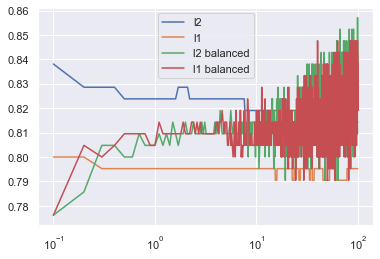

In [61]:
plt.figure()
for i in range(len(my_penalty)):
    plt.semilogx(c, list_1results[i])
    plt.semilogx(c,list_2results[i])
plt.legend(["l2", "l1", "l2 balanced", "l1 balanced"])

In [62]:
np.shape(list_1results)
max_value = np.max(list_1results)
max_value

0.8571428571428571

Entre la pénalité l1 et l2, on observe que c'est la pénalité l1 qui permet d'atteindre le plus haut niveau d'accuracy, pour un c=0.083. On choisit le c le plus petit (A COMPLETER)

We therefore deduce that the linear regression model producing the best accuracy is the 'liblinear' solver model, with the penalty 'l1' and a c value of 0.083 (which is not surprising as this solver was explained in the python notice as being ideal for small datasets, but ours only has 350 observations).
Moreover, liblinear is particularly well suited for binary classifications.

## 7.1.2 Naive Bayes Classifier : Gaussian NB et Bernoulli NB

In [63]:
# Gaussian NB
my_var=np.arange(1,100,0.1)
parameters={'var_smoothing':my_var}

nb_gauss=GaussianNB()

clf_gauss=GridSearchCV(nb_gauss, parameters)
clf_gauss.fit(X_train, y_train)

results_gauss=clf_gauss.cv_results_
# score: accuracy de validation du modèle testé
results2_gauss=results_gauss['mean_test_score']



In [64]:
# Bernoulli NB
my_alpha=np.arange(1,100,0.1)
parameters={'alpha':my_alpha}

nb_bernoulli=BernoulliNB()

clf_bernoulli=GridSearchCV(nb_bernoulli, parameters)
clf_bernoulli.fit(X_train, y_train)

results_bernoulli=clf_bernoulli.cv_results_
# score: accuracy de validation du modèle testé
results2_bernoulli=results_bernoulli['mean_test_score']

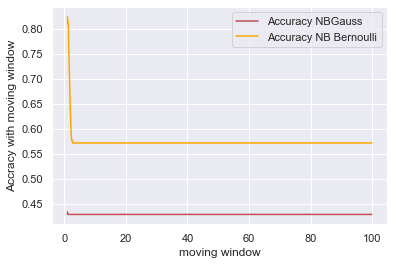

In [65]:
# Maintenant, on réalise un graphique avec les résultats de précision des naive bayes de Gauss et de Bernoulli, afin
# d'évaluer quel modèle donne la meilleure accuracy
vecteur_plot=np.arange(1,100, 0.1)

plt.figure()
plt.plot(vecteur_plot,results2_gauss,"r")
plt.plot(vecteur_plot,results2_bernoulli,"orange")

plt.legend(["Accuracy NBGauss", "Accuracy NB Bernoulli"])
plt.xlabel("moving window") # NOM A CHANGER
plt.ylabel("Accracy with moving window")
plt.show()

In [66]:
np.where(results2_bernoulli==results2_bernoulli.max())

(array([0], dtype=int64),)

In [70]:
results2_bernoulli[0]

0.8238095238095238

## 7.2 NON-parametric models

### 7.2.1 Decision Trees


#### A. Random Forest Classifier

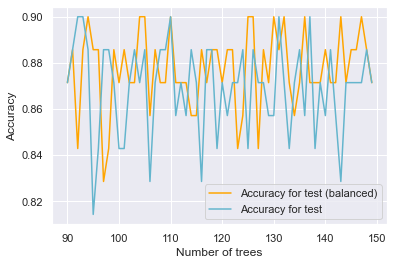

In [71]:

# on calcule l'accuracy de la partie train et test pour un nombre d'arbres i appartenant à [90,120] et on affiche
# ces valeurs dans un graphique afin de déterminer quel nombre 
# d'arbres maximise l'accuracy. Nous avons choisi cette valeur d'intervalle pour le nombre d'arbres car le nombre d'arbres par 
#défaut est 100, nous pensons donc que l'intervalle [90,120] est pertinente pour trouver le nombre optimal d'arbres.
acc_train_vector_ba=np.zeros((60,))
acc_test_vector_ba=np.zeros((60,))
acc_train_vector_rf=np.zeros((60,))
acc_test_vector_rf=np.zeros((60,))

vecteur_test=np.arange(90,150)

# on crée ensuite la boucle qui permettra de calculer l'accuracy de la partie train et test pour chacune des 25
#valeurs du nombre de voisins :

for my_nb_trees in vecteur_test:
    # Modèle de Random Forest avec option balanced
    RFC_balanced= RandomForestClassifier(n_estimators=my_nb_trees, class_weight = "balanced")
    RFC_balanced.fit(X_train2, y_train2)
    
    y_pred_test_ba=RFC_balanced.predict(X_test2)
    
    
    accuracy_test_ba=balanced_accuracy_score(y_test2, y_pred_test_ba, sample_weight=None, adjusted=False)
    acc_test_vector_ba[my_nb_trees-90]=accuracy_test_ba
    

    RFC= RandomForestClassifier(n_estimators=my_nb_trees)
    RFC.fit(X_train2, y_train2)
    
    y_predict_test_rf=RFC.predict(X_test2)
    
    
    accuracy_test_rf=balanced_accuracy_score(y_test2, y_predict_test_rf, sample_weight=None, adjusted=False)
    acc_test_vector_rf[my_nb_trees-90]=accuracy_test_rf
    
# on réalise le graphique
    
plt.figure()
plt.plot(vecteur_test,acc_test_vector_ba,"orange")
plt.plot(vecteur_test, acc_test_vector_rf, "c")
plt.legend(["Accuracy for test (balanced)", "Accuracy for test"])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

### C. SVM

In [76]:
# On teste tout d'abord le modèle SVM pour le type de noyaux "rbf" (noyau par défaut) et "linear", dont le seul paramètre à
# modifier est C

my_c=np.arange(0.01, 10, 0.01)
my_kernels=()
parameters={'kernel':('linear', 'rbf'), 'C':my_c}
svc=SVC()

clf_balanced=GridSearchCV(svc, parameters)

clf_balanced.fit(X_train2, y_train2)

results_balanced=clf_balanced.cv_results_
results2_balanced=results_balanced['mean_test_score']

clf_nb=GridSearchCV(svc, parameters)
clf_nb.fit(X_train2, y_train2)

results_nb=clf_nb.cv_results_
results2_nb=results_nb['mean_test_score']

print(clf_balanced.best_params_ , clf_balanced.best_score_)
print(clf_nb.best_params_ , clf_nb.best_score_)

{'C': 0.01, 'kernel': 'linear'} 0.825
{'C': 0.01, 'kernel': 'linear'} 0.825


In [77]:
len(results2_balanced)

1998

In [79]:
results2_balanced=np.reshape(results2_balanced, (999, 2))
results2_nb=np.reshape(results2_nb, (999, 2))

In [1]:
vecteur_plot=np.arange(0.01,10, 0.01)

plt.figure()
plt.plot(vecteur_plot,results2_balanced)
plt.plot(vecteur_plot,results2_nb)

plt.legend(["Linear balanced", "rbf balanced", "Linear non balanced", "rbf non balanced"])
plt.xlabel("Paramètre C")
plt.ylabel("SVM accurcacy with different kernel")
plt.show()

NameError: name 'np' is not defined

In [ ]:
#test de jorge 